# Introduction

This kernel is inspired by the following kernels: [kickstarter Success Classifier [0.685]](https://www.kaggle.com/majickdave/kickstarter-success-classifier-0-685)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
# read csv.
df = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv")

# add count.
df['count'] = 1

# add state_type.
df.loc[df['state'] == 'failed', 'state_type'] = 'failed'
df.loc[df['state'] == 'successful', 'state_type'] = 'successful'

# to datetime.
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

# add days.
df['days'] = (df['deadline'] - df['launched']).dt.days

FileNotFoundError: [Errno 2] File /kaggle/input/kickstarter-projects/ks-projects-201801.csv does not exist: '/kaggle/input/kickstarter-projects/ks-projects-201801.csv'

In [5]:
df.head()

NameError: name 'df' is not defined

In [6]:
# show heatmap.
sns.heatmap(df.isnull())

NameError: name 'df' is not defined

# Show main category.

In [5]:
df.groupby('main_category').sum().index

Index(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater'],
      dtype='object', name='main_category')

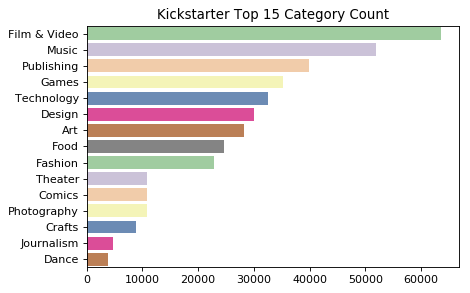

In [6]:
#sns.set_style('darkgrid')
mains = df.main_category.value_counts().head(15)

x = mains.values
y = mains.index

fig = plt.figure(dpi=80)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="Accent", alpha=0.8)

plt.title('Kickstarter Top 15 Category Count')
plt.show()

In [7]:
mains

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

# Show sub category.

In [8]:
df.groupby('category').sum().index

Index(['3D Printing', 'Academic', 'Accessories', 'Action', 'Animals',
       'Animation', 'Anthologies', 'Apparel', 'Apps', 'Architecture',
       ...
       'Wearables', 'Weaving', 'Web', 'Webcomics', 'Webseries', 'Woodworking',
       'Workshops', 'World Music', 'Young Adult', 'Zines'],
      dtype='object', name='category', length=159)

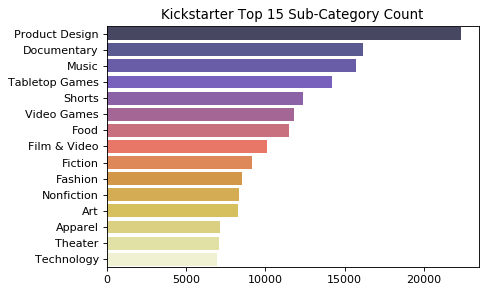

In [9]:
cats = df.category.value_counts().head(15)

x = cats.values
y = cats.index

fig = plt.figure(dpi=80)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="CMRmap", alpha=0.8)

plt.title('Kickstarter Top 15 Sub-Category Count')
plt.show()

In [10]:
cats

Product Design    22314
Documentary       16139
Music             15727
Tabletop Games    14180
Shorts            12357
Video Games       11830
Food              11493
Film & Video      10108
Fiction            9169
Fashion            8554
Nonfiction         8318
Art                8253
Apparel            7166
Theater            7057
Technology         6930
Name: category, dtype: int64

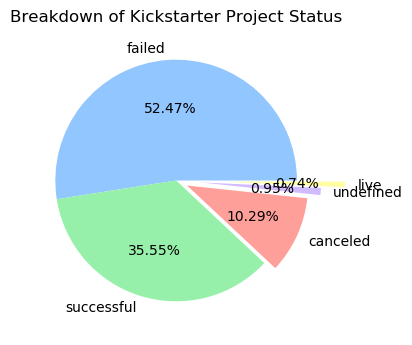

In [11]:
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(1, 1, dpi=100)
explode = [0,0,.1,.2, .4]
df.state.value_counts().head(5).plot.pie(autopct='%0.2f%%',
                                        explode=explode)

plt.title('Breakdown of Kickstarter Project Status')
plt.ylabel('')
plt.show()

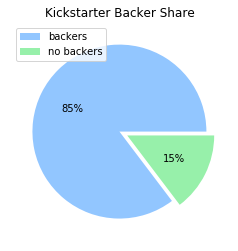

In [12]:
fig, ax = plt.subplots(1, 1)
(df.backers >=1).value_counts().plot.pie(autopct='%0.0f%%', 
                                         explode=[0,.1], 
                                         labels=None, 
                                         shadow=False)

plt.ylabel('')
plt.title('Kickstarter Backer Share')
plt.legend(['backers', 'no backers'], loc=2)

plt.show()

In [13]:
df_failed = df[df['state'] == 'failed']
df_successful = df[df['state'] == 'successful']

In [14]:
df_failed.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,count,days
count,1.977190e+05,1.977190e+05,1.977190e+05,197719.000000,197614.000000,197719.000000,1.977190e+05,197719.0,197719.000000
mean,1.074639e+09,6.734685e+04,1.426971e+03,16.422352,1133.741030,1320.603817,6.317474e+04,1.0,34.173352
std,6.192215e+08,1.447227e+06,9.564415e+03,71.224123,6221.653617,6820.249351,1.435683e+06,0.0,13.175104
min,5.971000e+03,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,1.500000e-01,1.0,0.000000
25%,5.385642e+08,2.500000e+03,3.000000e+00,1.000000,0.000000,2.640000,2.500000e+03,1.0,29.000000
50%,1.073242e+09,7.500000e+03,1.000000e+02,3.000000,66.000000,100.000000,7.500000e+03,1.0,29.000000
75%,1.611052e+09,2.000000e+04,6.710000e+02,12.000000,512.000000,663.000000,2.000000e+04,1.0,39.000000
max,2.147467e+09,1.000000e+08,1.748630e+06,6550.000000,721036.460000,757352.940000,1.663614e+08,1.0,91.000000


In [15]:
df_successful.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,count,days
count,1.339560e+05,1.339560e+05,1.339560e+05,133956.000000,1.338510e+05,1.339560e+05,1.339560e+05,133956.0,133956.000000
mean,1.073727e+09,1.016296e+04,2.409978e+04,263.921362,1.735603e+04,2.267080e+04,9.532853e+03,1.0,31.156469
std,6.191514e+08,3.124829e+04,1.584713e+05,1504.580142,1.301228e+05,1.510903e+05,2.796144e+04,0.0,11.771117
min,2.110900e+04,1.000000e-02,1.000000e+00,0.000000,0.000000e+00,7.900000e-01,1.000000e-02,1.0,0.000000
25%,5.354443e+08,1.250000e+03,1.977750e+03,33.000000,1.162000e+03,2.000000e+03,1.301915e+03,1.0,29.000000
50%,1.076595e+09,3.923000e+03,5.117000e+03,71.000000,3.655660e+03,5.107250e+03,3.837740e+03,1.0,29.000000
75%,1.608161e+09,1.000000e+04,1.344025e+04,167.000000,1.042600e+04,1.323208e+04,1.000000e+04,1.0,33.000000
max,2.147476e+09,2.000000e+06,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,2.015609e+06,1.0,91.000000


# Success rate Trend.

In [16]:
#Plot Success Trend.

#success
df2 = df_successful[['launched', 'count']]
df2.set_index('launched', inplace=True)
df2 = df2.resample('Y').sum() 
df2

# failed
df3 = df_failed[['launched', 'count']]
df3.set_index('launched', inplace=True)
df3 = df3.resample('Y').sum() 
df3

df4 = df[['launched', 'count']]
df4 = df4[(df4['launched'] >= '2009-01-01') & (df4['launched'] < '2018-01-01')]
df4.set_index('launched', inplace=True)
df4 = df4.resample('Y').sum() 
df4

df5 = df2 / df4 * 100
df5

,count
launched,
2009-12-31,43.566591
2010-12-31,43.663846
2011-12-31,46.388688
2012-12-31,43.464108
2013-12-31,43.287775
2014-12-31,31.156543
2015-12-31,27.129366
2016-12-31,32.816872
2017-12-31,35.367816


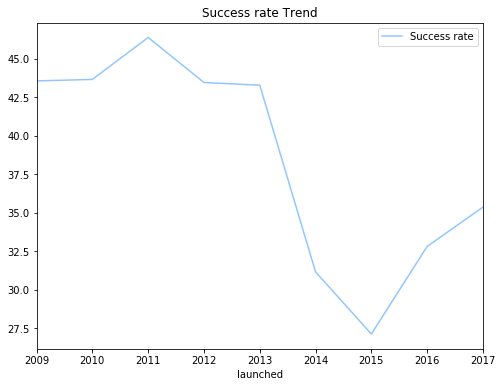

In [17]:
df5['count'].plot(label="Success rate", figsize = (8, 6))
plt.title('Success rate Trend')
plt.legend(ncol=1)
plt.show()

# Show a graph comparing failures and successes by main category

In [18]:
# Group by main_category
grouped = df[['main_category', 'state_type', 'count']].groupby(['main_category', 'state_type']).sum()

failed = grouped.xs('failed',level="state_type")["count"]
success = grouped.xs('successful',level="state_type")["count"]

index = failed.index
df1 = pd.DataFrame({'failed': failed, 'success': success}, index=index)

df1

,failed,success
main_category,,
Art,14131,11510
Comics,4036,5842
Crafts,5703,2115
Dance,1235,2338
Design,14814,10550
Fashion,14182,5593
Film & Video,32904,23623
Food,15969,6085
Games,16003,12518


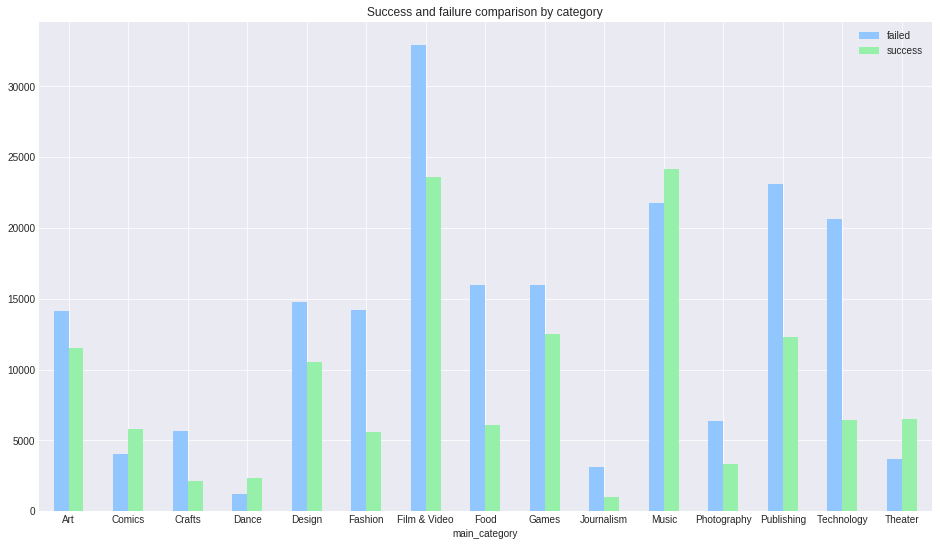

In [19]:
plt.style.use('seaborn-darkgrid')
ax = df1.plot.bar(figsize = (16, 9), rot=0)
plt.title('Success and failure comparison by category')
fig = ax.get_figure()

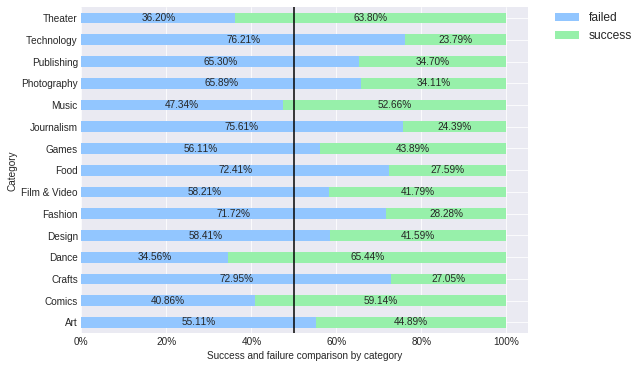

In [20]:
# show Success and failure comparison by category

category = df1.index
success = df1['success'] / (df1['success'] + df1['failed'])
failed = df1['failed'] / (df1['success'] + df1['failed'])

index = failed.index
df2 = pd.DataFrame({'failed': failed, 'success': success}, index=index)

ax = df2.plot.barh(stacked = True, figsize = (8,6))

# we also need to switch the labels
plt.xlabel('Success and failure comparison by category')  
plt.ylabel('Category')
    
ind = np.arange(15)
lst = df2.values

for x, y in zip(ind, lst):
    plt.text(y[0]/2, x, '{:.2%}'.format(y[0]), ha='center', va='center')
    plt.text((y[0] + (y[1]/2)), x, '{:.2%}'.format(y[1]), ha='center', va='center')
    
plt.vlines([0.5], -1, 100, "black")
    
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.show()

In [21]:
# add goal decile rank.
df['goal_decile_rank'] = pd.qcut(df['goal'], 10, labels=False)
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,count,state_type,days,goal_decile_rank
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,1,failed,58,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,1,failed,59,8
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,1,failed,44,8
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,1,failed,29,4
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,1,NaN,55,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00,1,NaN,29,8
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00,1,failed,26,1
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00,1,failed,45,7
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00,1,failed,30,7


In [22]:
# Group by goal_decile_rank
grouped = df[['goal_decile_rank', 'state_type', 'count']].groupby(['goal_decile_rank', 'state_type']).sum()

failed = grouped.xs('failed',level="state_type")["count"]
success = grouped.xs('successful',level="state_type")["count"]

index = failed.index
df6 = pd.DataFrame({'failed': failed, 'success': success}, index=index)

df6

,failed,success
goal_decile_rank,,
0,15229,19273
1,19223,19968
2,15988,15254
3,17650,16258
4,19154,12220
5,19325,14331
6,21094,11987
7,21470,11174
8,28361,10170


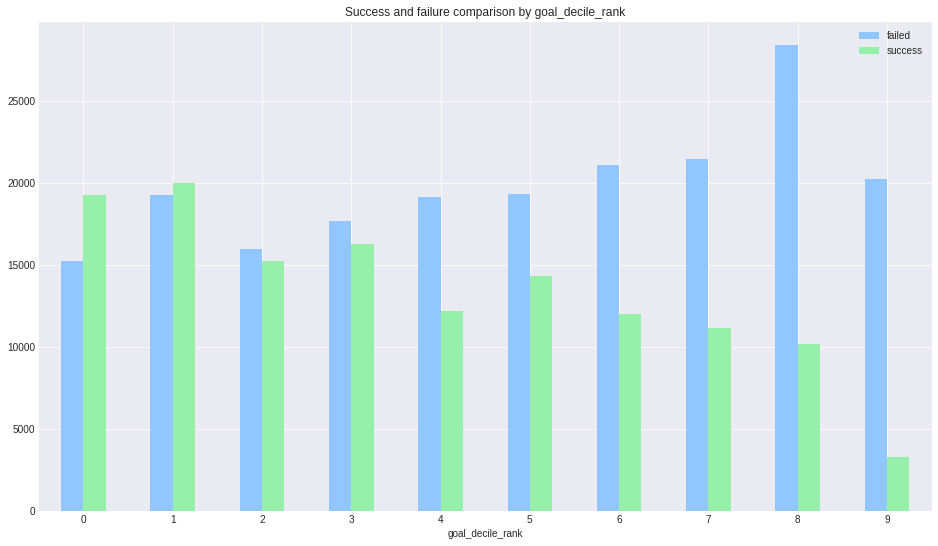

In [23]:
plt.style.use('seaborn-darkgrid')
ax = df6.plot.bar(figsize = (16, 9), rot=0)
plt.title('Success and failure comparison by goal_decile_rank')
fig = ax.get_figure()

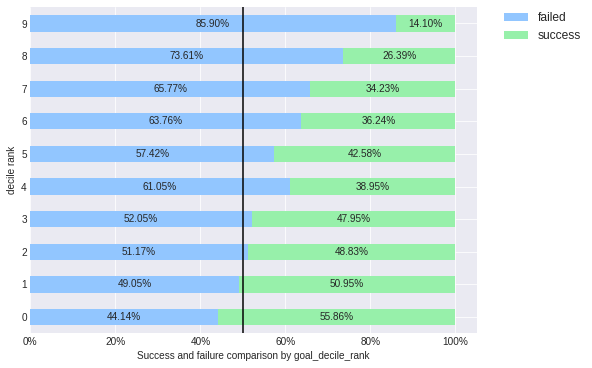

In [24]:
# show Success and failure comparison by goal_decile_rank

category = df6.index
success = df6['success'] / (df6['success'] + df6['failed'])
failed = df6['failed'] / (df6['success'] + df6['failed'])

index = failed.index
df7 = pd.DataFrame({'failed': failed, 'success': success}, index=index)

ax = df7.plot.barh(stacked = True, figsize = (8,6))

# we also need to switch the labels
plt.xlabel('Success and failure comparison by goal_decile_rank')  
plt.ylabel('decile rank')
    
ind = np.arange(15)
lst = df7.values

for x, y in zip(ind, lst):
    plt.text(y[0]/2, x, '{:.2%}'.format(y[0]), ha='center', va='center')
    plt.text((y[0] + (y[1]/2)), x, '{:.2%}'.format(y[1]), ha='center', va='center')
    
plt.vlines([0.5], -1, 100, "black")
    
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.show()

# Feature Engineering

In [25]:
features = df.copy()
features['success'] = np.where(features.state == 'successful', 1, 0)

In [26]:
df_dummy = pd.get_dummies(features['main_category'])
features = pd.concat([features.drop(['main_category'],axis=1),df_dummy],axis=1)

In [27]:
features['US'] = np.where(features.country=='US', 1,0)

In [28]:
features.drop(['ID', 'name', 'category', 'currency', 'backers', 'pledged', 'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'deadline', 'launched', 'country', 'state', 'state_type', 'count'], axis=1, inplace=True)

In [29]:
#features = features.dropna()
features.drop(features.columns[np.isnan(features).any()], axis=1, inplace=True)

In [30]:
med = features['goal'].median()
MAD = 1.4826 * np.median(abs(features['goal']-med))
features = features[(med - 3 * MAD < features['goal']) & (features['goal'] < med + 3 * MAD)]

In [31]:
med = features['days'].median()
MAD = 1.4826 * np.median(abs(features['days']-med))
features = features[(med - 3 * MAD < features['days']) & (features['days'] < med + 3 * MAD)]

# Classification

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble

In [33]:
X = features.drop(['success'], 1)
y = features.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(penalty='l2', solver='liblinear')

# Fit the model.
fit = lr.fit(X_train, y_train)

# Display.
# print('Coefficients')
# print(fit.coef_)
# print(fit.intercept_)

pred_y_sklearn = fit.predict(X_test)

print('\n Accuracy by success')
print(pd.crosstab(pred_y_sklearn, y_test))

print('\n Percentage accuracy')
print(lr.score(X_test, y_test))

# CV
#scores = cross_val_score(lr, X, y, cv=10)

#print(scores)


 Accuracy by success
success      0      1
row_0                
0        22485  13885

 Percentage accuracy
0.6182293098707726


# Try Gradient Boosting

In [35]:
def gradient_boost(estimators, depth, loss_function, sampling):
    clf = ensemble.GradientBoostingClassifier(n_estimators=estimators, 
                                              max_depth=depth, 
                                              loss=loss_function, 
                                              subsample=sampling
                                              )
    clf.fit(X_train, y_train)
    print('\n Percentage accuracy for Gradient Boosting Classifier')
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

# Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    
    train_accuracy = 1 - (train_tI_errors + train_tII_errors)
    test_accuracy = 1 - (test_tI_errors + test_tII_errors)
    
    print((
    'Training set accuracy:\n'
    'Overall Accuracy: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Overall Accuracy: {}\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
    ).format(train_accuracy, train_tI_errors, train_tII_errors, test_accuracy, test_tI_errors, test_tII_errors))

In [36]:
#500 estimators, max depth of 2, loss function = 'deviance', subsampling default to 1.0
gradient_boost(500, 2, 'deviance', 1.0)


 Percentage accuracy for Gradient Boosting Classifier
Training set accuracy:
Overall Accuracy: 0.6582393335120533
Percent Type I errors: 0.08949057939633899
Percent Type II errors: 0.2522700870916077

Test set accuracy:
Overall Accuracy: 0.652075886719824
Percent Type I errors: 0.09180643387407204
Percent Type II errors: 0.2561176794061039


# Gradient Boosting gets 65.3% test set accuracy

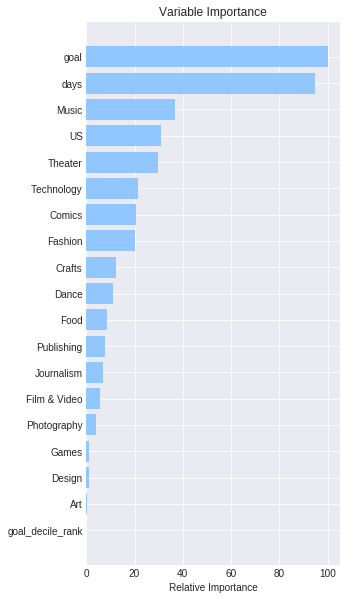

In [37]:
clf = ensemble.GradientBoostingClassifier(n_estimators=500, max_depth=2, loss='deviance', subsample=1.0)
clf.fit(X_train, y_train)

feature_importance = clf.feature_importances_[:30]

# Make importances relative to max importance.
plt.figure(figsize=(10,10))
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Try LightGBM

In [38]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

clf_lgbm = LGBMClassifier(
        n_estimators=300,
        num_leaves=15,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
    )

clf_lgbm.fit(X_train, 
        y_train,
        eval_set= [(X_train, y_train), (X_test, y_test)], 
        eval_metric='auc', 
        verbose=0, 
        early_stopping_rounds=30
       )

acc_clf_lgbm = round(clf_lgbm.score(X_test, y_test) * 100, 2)
acc_clf_lgbm

# # Run Cross validation
# scores = cross_val_score(clf_lgbm, X, y, cv=5)
# np.mean(scores)

65.44